| **Inicio** | **atrás 8** | **Siguiente 10** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./8_Machine_Learning.ipynb)| [⏩](./10_Machine_Learning.ipynb)|

# **81. Introducción al Random Forest, Intuition behind the Algorithm**

**Introducción al Random Forest y la Intuición detrás del Algoritmo:**

Random Forest es un algoritmo de aprendizaje conjunto que se basa en la técnica de Bagging (Bootstrap Aggregating). Este algoritmo se utiliza tanto para problemas de clasificación como de regresión y se destaca por su capacidad para mejorar la precisión y la robustez de los modelos.

**Intuición detrás del Algoritmo:**

La intuición detrás de Random Forest radica en la diversidad y autonomía de los árboles de decisión que lo componen. En lugar de depender de un solo árbol de decisión, Random Forest construye múltiples árboles de forma paralela, cada uno entrenado en un subconjunto aleatorio de datos y características. Luego, combina las predicciones de estos árboles para obtener una predicción final. Este enfoque reduce la varianza, evita el sobreajuste y mejora la capacidad de generalización del modelo.

**Ejemplo en Código:**

Vamos a utilizar Random Forest para clasificar un conjunto de datos. En este caso, utilizaremos el conjunto de datos Iris.


Precisión del Random Forest: 0.7666666666666667


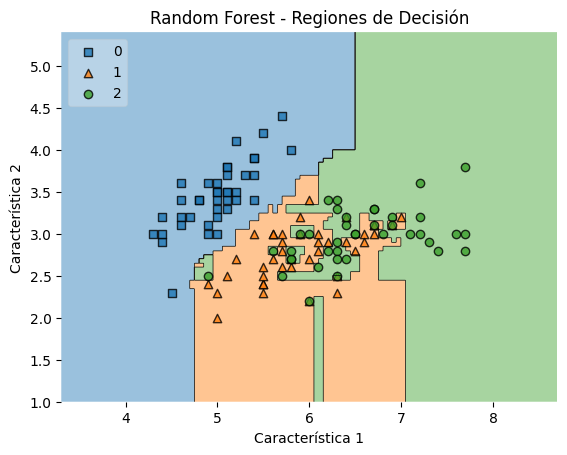

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, test_size=0.2, random_state=42)

# Crear un clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest: {accuracy}')

# Visualización de las regiones de decisión
plot_decision_regions(X_train, y_train, clf=rf_classifier, legend=2)
plt.title('Random Forest - Regiones de Decisión')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Visualización:**

La visualización muestra las regiones de decisión creadas por Random Forest en el espacio de características. Cada punto en el gráfico representa una instancia del conjunto de entrenamiento, y los colores indican las clases a las que pertenecen. Notarás que las regiones de decisión son más suaves y generalizan mejor en comparación con un solo árbol de decisión.

Random Forest aprovecha la diversidad de los árboles al incorporar muestreo aleatorio y características en cada árbol individual. Además, al combinar las predicciones de múltiples árboles, se obtiene una predicción más robusta y resistente a los ruidos o variabilidades en los datos. Esto hace que Random Forest sea una opción popular para mejorar el rendimiento de los modelos de aprendizaje automático.

# **82. ¿Cómo funciona tan bien Random Forest? Compensación de varianza de sesgo en bosque aleatorio**

**Compensación de Varianza y Sesgo en Random Forest:**

La capacidad de Random Forest para mejorar el rendimiento de los modelos se debe en gran medida a su capacidad para abordar el trade-off entre sesgo y varianza, un concepto fundamental en el aprendizaje automático.

**Sesgo y Varianza:**

- **Sesgo (Bias):** Se refiere a la simplificación de las suposiciones del modelo. Modelos con alto sesgo tienden a subajustar los datos y no capturan la complejidad subyacente de los mismos.

- **Varianza:** Se refiere a la sensibilidad del modelo a pequeñas variaciones en los datos de entrenamiento. Modelos con alta varianza pueden sobreajustarse a los datos de entrenamiento y no generalizar bien a datos no vistos.

**Random Forest y Compensación Sesgo-Varianza:**

Random Forest utiliza múltiples árboles de decisión, cada uno entrenado en un subconjunto aleatorio de datos y características. Esto tiene varios beneficios:

1. **Diversidad de Modelos:** Cada árbol se entrena en un subconjunto diferente de datos, lo que resulta en árboles distintos. Esta diversidad reduce la correlación entre los árboles.

2. **Combinación de Predicciones:** Las predicciones de múltiples árboles se promedian o votan para obtener la predicción final. Esto ayuda a reducir la varianza del modelo al mitigar los errores individuales de cada árbol.

**Ejemplo en Código y Visualización:**

Vamos a ilustrar la compensación de varianza y sesgo utilizando Random Forest en un conjunto de datos sintético.


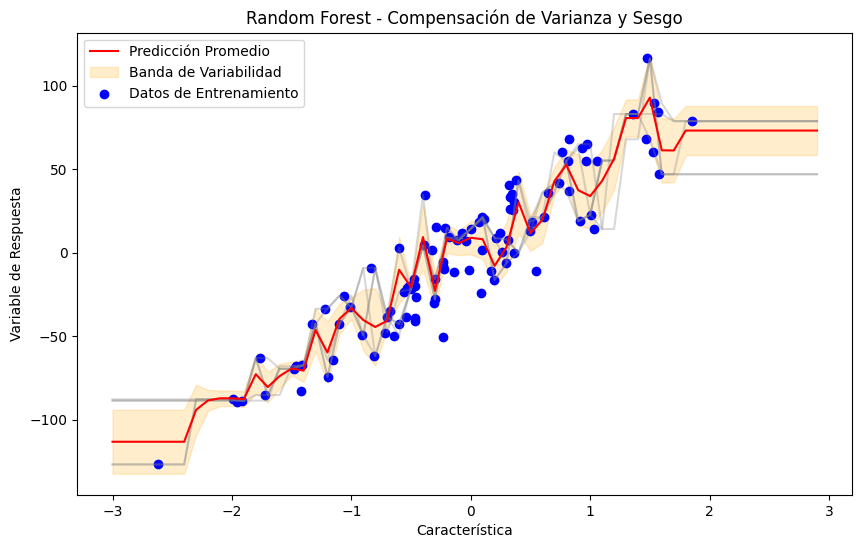

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

# Crear un conjunto de datos sintético para regresión
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Crear un regresor Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_regressor.fit(X, y)

# Generar datos de prueba
X_test = np.arange(-3, 3, 0.1).reshape(-1, 1)

# Realizar predicciones en los datos de prueba
y_pred_mean = np.mean([tree.predict(X_test) for tree in rf_regressor.estimators_], axis=0)
y_pred_std = np.std([tree.predict(X_test) for tree in rf_regressor.estimators_], axis=0)

# Visualización
plt.figure(figsize=(10, 6))

# Dibujar las predicciones individuales de algunos árboles
for i in range(5):
    plt.plot(X_test, rf_regressor.estimators_[i].predict(X_test), color='gray', alpha=0.3)

# Dibujar la predicción promedio y la banda de variabilidad
plt.plot(X_test, y_pred_mean, color='red', label='Predicción Promedio')
plt.fill_between(X_test.flatten(), y_pred_mean - y_pred_std, y_pred_mean + y_pred_std, color='orange', alpha=0.2, label='Banda de Variabilidad')

# Dibujar los datos de entrenamiento
plt.scatter(X, y, color='blue', label='Datos de Entrenamiento')

plt.title('Random Forest - Compensación de Varianza y Sesgo')
plt.xlabel('Característica')
plt.ylabel('Variable de Respuesta')
plt.legend()
plt.show()

**Visualización:**

La visualización muestra las predicciones individuales de algunos árboles (en gris) y la predicción promedio con una banda de variabilidad (en rojo y naranja). Observarás que, aunque los árboles individuales pueden variar, la predicción promedio tiende a capturar la tendencia general del conjunto de datos. La banda de variabilidad proporciona una medida de la incertidumbre en las predicciones.

Random Forest compensa la varianza al promediar las predicciones de múltiples árboles, reduciendo así la sensibilidad a pequeñas variaciones en los datos de entrenamiento. Este enfoque es clave para mejorar la generalización y el rendimiento del modelo en datos no vistos.

# **83. ¿Cuál es la diferencia entre Bagging y Random Forest?**

**Diferencia entre Bagging y Random Forest:**

Ambas Bagging (Bootstrap Aggregating) y Random Forest son técnicas de aprendizaje conjunto que buscan mejorar la precisión y la estabilidad de los modelos individuales. Sin embargo, hay una diferencia clave entre los dos en términos de cómo construyen y combinan los modelos base.

**Bagging:**

- **Proceso:** Bagging implica entrenar múltiples modelos base (por lo general, del mismo tipo) en diferentes subconjuntos de datos de entrenamiento creados mediante muestreo bootstrap (muestreo con reemplazo).

- **Combinación de Predicciones:** Las predicciones de cada modelo base se combinan tomando un promedio (en el caso de regresión) o un voto mayoritario (en el caso de clasificación) para obtener la predicción final.

**Random Forest:**

- **Proceso:** Random Forest es una variante específica de Bagging que se aplica a árboles de decisión. Cada árbol se entrena en un subconjunto aleatorio de características, además de los datos de entrenamiento que se seleccionan mediante muestreo bootstrap.

- **Combinación de Predicciones:** Al igual que en Bagging, las predicciones de los árboles individuales se combinan tomando un promedio (en el caso de regresión) o un voto mayoritario (en el caso de clasificación) para obtener la predicción final.

**Ejemplo en Código y Visualización:**

Vamos a utilizar Bagging y Random Forest en un conjunto de datos de clasificación para ilustrar las diferencias. En este caso, utilizaremos el conjunto de datos Iris.

Precisión del Bagging Classifier: 0.7333333333333333


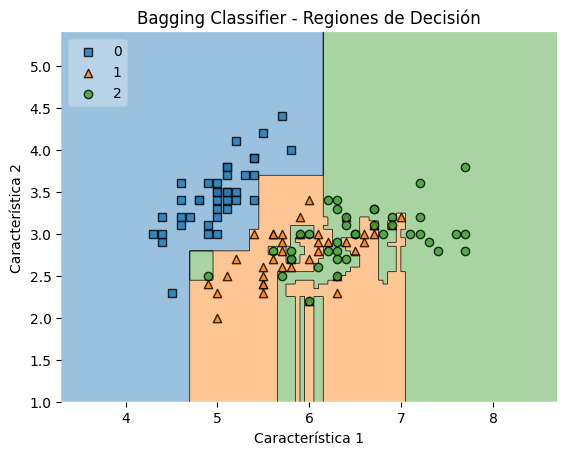

In [5]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, test_size=0.2, random_state=42)

# Crear un clasificador Bagging con el nuevo nombre del parámetro
bagging_classifier = BaggingClassifier(estimator=None, n_estimators=100, random_state=42)

# Entrenar el modelo Bagging
bagging_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_bagging = bagging_classifier.predict(X_test)

# Calcular la precisión del modelo Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f'Precisión del Bagging Classifier: {accuracy_bagging}')


# Visualización de las regiones de decisión del Bagging
plot_decision_regions(X_train, y_train, clf=bagging_classifier, legend=2)
plt.title('Bagging Classifier - Regiones de Decisión')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

Precisión del Random Forest Classifier: 0.7666666666666667


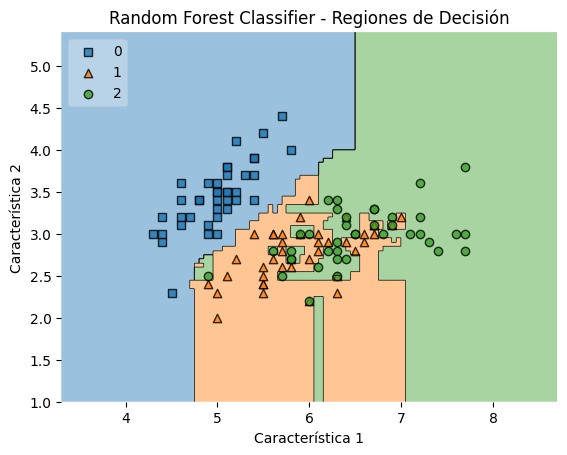

In [4]:
# Crear un clasificador Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo Random Forest
random_forest_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = random_forest_classifier.predict(X_test)

# Calcular la precisión del modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Precisión del Random Forest Classifier: {accuracy_rf}')

# Visualización de las regiones de decisión del Random Forest
plot_decision_regions(X_train, y_train, clf=random_forest_classifier, legend=2)
plt.title('Random Forest Classifier - Regiones de Decisión')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Visualización:**

Las visualizaciones muestran las regiones de decisión creadas por el clasificador Bagging y el clasificador Random Forest en el espacio de características. Observarás que ambos métodos generan regiones de decisión suaves, pero Random Forest tiene una tendencia a ser aún más robusto debido al muestreo adicional de características.

En resumen, mientras que Bagging puede aplicarse a cualquier tipo de modelo base, Random Forest específicamente se enfoca en árboles de decisión, introduciendo la variabilidad adicional mediante el muestreo aleatorio de características. Esto puede resultar en un modelo más robusto y generalizable en comparación con Bagging convencional.

# **84. Hiperparámetros de bosque aleatorio**

Los hiperparámetros en un modelo de bosque aleatorio son los valores configurables que afectan la forma en que se construyen y ajustan los árboles de decisión dentro del bosque. Ajustar adecuadamente estos hiperparámetros puede marcar la diferencia en el rendimiento del modelo. Aquí hay algunos de los hiperparámetros clave en un bosque aleatorio:

1. **`n_estimators`:** Número de árboles en el bosque. Cuantos más árboles, mejor será el rendimiento del modelo, pero también aumentará el tiempo de entrenamiento. Un valor común es 100.

2. **`max_depth`:** La profundidad máxima de cada árbol. Controla la complejidad del modelo y ayuda a prevenir el sobreajuste. Un valor más bajo limitará la complejidad y hará que el modelo sea más generalizable.

3. **`min_samples_split`:** El número mínimo de muestras requeridas para dividir un nodo interno. Un valor más alto evita divisiones en nodos con muy pocas muestras.

4. **`min_samples_leaf`:** El número mínimo de muestras requeridas para estar en un nodo hoja. Un valor más alto proporciona nodos hoja más grandes y ayuda a suavizar el modelo.

5. **`max_features`:** El número máximo de características a considerar para la división de un nodo. Puede ser un número entero o una fracción. Reducir este valor puede hacer que los árboles sean más diversos y menos propensos al sobreajuste.

**Ejemplo en Código y Visualización:**

Vamos a utilizar un conjunto de datos de clasificación y ajustar un modelo de bosque aleatorio con diferentes valores de hiperparámetros.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Crear un clasificador Random Forest con hiperparámetros ajustados
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest Classifier: {accuracy}')

Precisión del Random Forest Classifier: 1.0


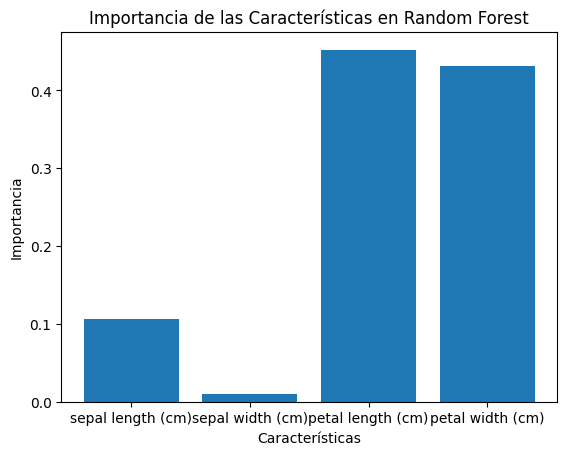

In [8]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
feature_importance = rf_classifier.feature_importances_

# Crear un gráfico de barras para visualizar la importancia de las características
plt.bar(iris.feature_names, feature_importance)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en Random Forest')
plt.show()

Este código ajusta un modelo de bosque aleatorio para clasificación en el conjunto de datos Iris. Puedes experimentar ajustando diferentes valores de `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, y `max_features` para ver cómo afectan el rendimiento del modelo.

La visualización específica de los hiperparámetros no es proporcionada directamente por scikit-learn, pero puedes utilizar métodos como la validación cruzada (`GridSearchCV` o `RandomizedSearchCV`) para explorar diferentes combinaciones de hiperparámetros y encontrar la configuración óptima para tu problema específico.

# **85. Bosque aleatorio de ajuste de hiperparámetros mediante GridSearchCV y RandomizedSearchCV**

Ajustar hiperparámetros es un paso crucial en la construcción de modelos de aprendizaje automático. `GridSearchCV` y `RandomizedSearchCV` son herramientas poderosas en scikit-learn para explorar y encontrar la combinación óptima de hiperparámetros. Vamos a utilizar Random Forest y el conjunto de datos Iris para ejemplificar cómo se realiza este proceso.

**GridSearchCV:**

`GridSearchCV` realiza una búsqueda exhaustiva en una cuadrícula de hiperparámetros predefinida. Se prueba cada combinación posible y se evalúa mediante validación cruzada. Es ideal para un número relativamente pequeño de combinaciones de hiperparámetros.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Crear un clasificador Random Forest
rf_classifier = RandomForestClassifier()

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

# Obtener el modelo con los mejores hiperparámetros
best_rf_classifier = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión con mejores hiperparámetros: {accuracy}')

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Precisión con mejores hiperparámetros: 1.0


**RandomizedSearchCV:**

`RandomizedSearchCV` realiza una búsqueda aleatoria en el espacio de hiperparámetros. A diferencia de `GridSearchCV`, no evalúa todas las combinaciones posibles, sino que selecciona aleatoriamente un número determinado de configuraciones para evaluar. Es útil cuando el espacio de búsqueda es grande y probar todas las combinaciones no es factible.

In [10]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None] + list(np.arange(5, 20, 1)),
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Ajustar el modelo con la búsqueda aleatoria
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_random = random_search.best_params_
print(f'Mejores hiperparámetros con búsqueda aleatoria: {best_params_random}')

# Obtener el modelo con los mejores hiperparámetros
best_rf_classifier_random = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_random = best_rf_classifier_random.predict(X_test)

# Calcular la precisión del modelo
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f'Precisión con mejores hiperparámetros (búsqueda aleatoria): {accuracy_random}')

Mejores hiperparámetros con búsqueda aleatoria: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5}
Precisión con mejores hiperparámetros (búsqueda aleatoria): 1.0


**Visualización:**

Para la visualización, puedes explorar las curvas de validación para diferentes hiperparámetros. Esto te dará una idea de cómo cambia el rendimiento del modelo con respecto a diferentes valores de un solo hiperparámetro.

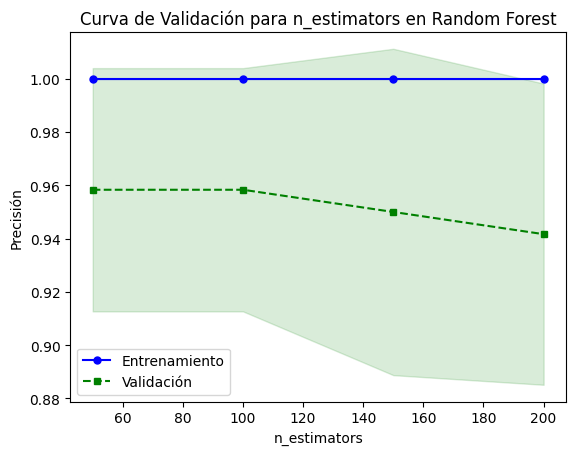

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Definir el espacio de búsqueda de hiperparámetros
param_range = [50, 100, 150, 200]

# Calcular la curva de validación para el hiperparámetro 'n_estimators'
train_scores, test_scores = validation_curve(estimator=RandomForestClassifier(), X=X_train, y=y_train, param_name='n_estimators', param_range=param_range, cv=5)

# Calcular la media y la desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de validación
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validación')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.xlabel('n_estimators')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de Validación para n_estimators en Random Forest')
plt.show()

Esta visualización te ayudará a identificar el rango de valores de hiperparámetros que proporcionan el mejor rendimiento en el conjunto de validación. Puedes adaptar este enfoque para explorar otras curvas de validación para diferentes hiperparámetros.

# **86. OOB Score, Out of Bag Evaluation in Random Forest**

El Out-of-Bag (OOB) Score es una característica única de los algoritmos basados en bagging, como el Random Forest. La idea principal detrás del OOB Score es utilizar las instancias que no fueron seleccionadas en un subconjunto de entrenamiento particular para evaluar la calidad del modelo.

**Funcionamiento del OOB Score en Random Forest:**

Cuando construimos un árbol en un bosque aleatorio, cada árbol se entrena en un subconjunto aleatorio de las muestras de entrenamiento. Las muestras que no se seleccionan para entrenar un árbol en particular se conocen como Out-of-Bag (OOB) samples.

El OOB Score se calcula tomando las instancias OOB y evaluando su predicción usando el árbol que no las incluyó en su conjunto de entrenamiento. Este proceso se repite para todos los árboles en el bosque, y luego se promedian los resultados.

**Ejemplo en Código y Visualización:**

Vamos a usar el conjunto de datos Iris y calcular el OOB Score para evaluar la precisión de un Random Forest.

OOB Score: 0.9166666666666666


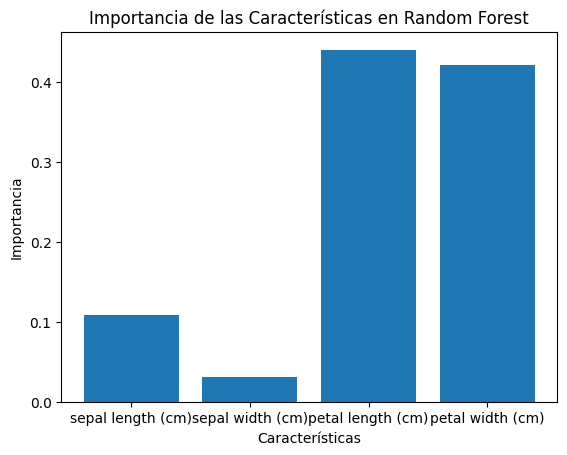

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Crear un clasificador Random Forest con la opción 'oob_score=True'
rf_classifier = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Calcular el OOB Score
oob_score = rf_classifier.oob_score_
print(f'OOB Score: {oob_score}')

# Visualización de la importancia de las características
feature_importance = rf_classifier.feature_importances_
plt.bar(iris.feature_names, feature_importance)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en Random Forest')
plt.show()

En este ejemplo, después de entrenar el Random Forest, podemos acceder al OOB Score utilizando el atributo `oob_score_`. También podemos visualizar la importancia de las características, que es otra característica interesante proporcionada por Random Forest.

El OOB Score es particularmente útil porque proporciona una evaluación "interna" del rendimiento del modelo sin necesidad de un conjunto de validación separado. Sin embargo, si se dispone de un conjunto de validación, es recomendable usarlo para evaluar el rendimiento del modelo de manera más completa.

# **87. Importancia de las características utilizando bosques aleatorios y árboles de decisión | ¿Cómo se calcula la importancia de las características?**

La importancia de las características en bosques aleatorios y árboles de decisión se refiere a la medida de la contribución de cada característica a la precisión del modelo. Cuanto más importante sea una característica, más influye en las decisiones tomadas por el modelo.

**Cálculo de la Importancia de las Características:**

En el contexto de bosques aleatorios, la importancia de una característica se calcula mediante la media de la reducción de la impureza (Gini impurity o entropía) que la característica aporta en cada árbol del bosque.

Para cada nodo de división en un árbol de decisión, la reducción de la impureza se calcula tomando la impureza ponderada antes de la división menos la impureza ponderada después de la división. Luego, se promedian estas reducciones de impureza en todos los nodos de división en los que se utiliza la característica.

**Ejemplo en Código y Visualización:**

Vamos a usar el conjunto de datos Iris y calcular la importancia de las características tanto para un árbol de decisión como para un bosque aleatorio.

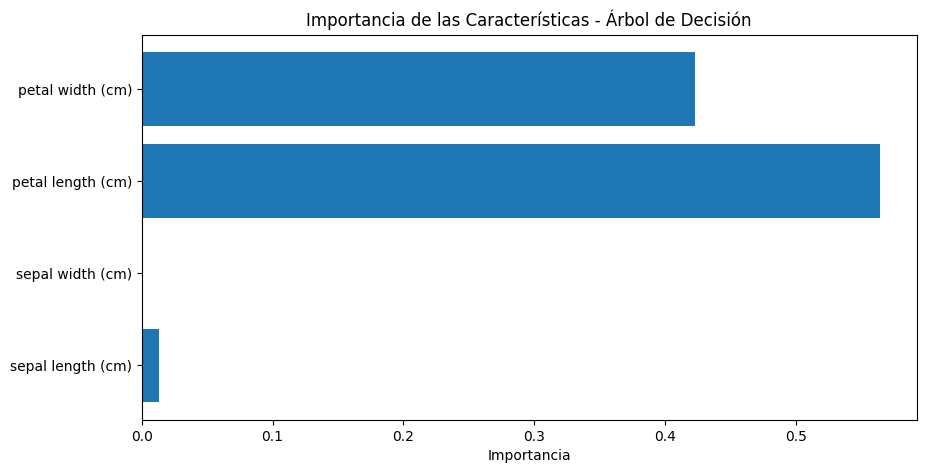

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Crear un clasificador de árbol de decisión
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X, y)

# Crear un clasificador de bosque aleatorio
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Obtener la importancia de las características
importance_dt = dt_classifier.feature_importances_
importance_rf = rf_classifier.feature_importances_

# Obtener nombres de características
feature_names = iris.feature_names

# Visualización de la importancia de las características para el árbol de decisión
plt.figure(figsize=(10, 5))

plt.barh(range(len(importance_dt)), importance_dt, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Importancia')
plt.title('Importancia de las Características - Árbol de Decisión')

plt.show()

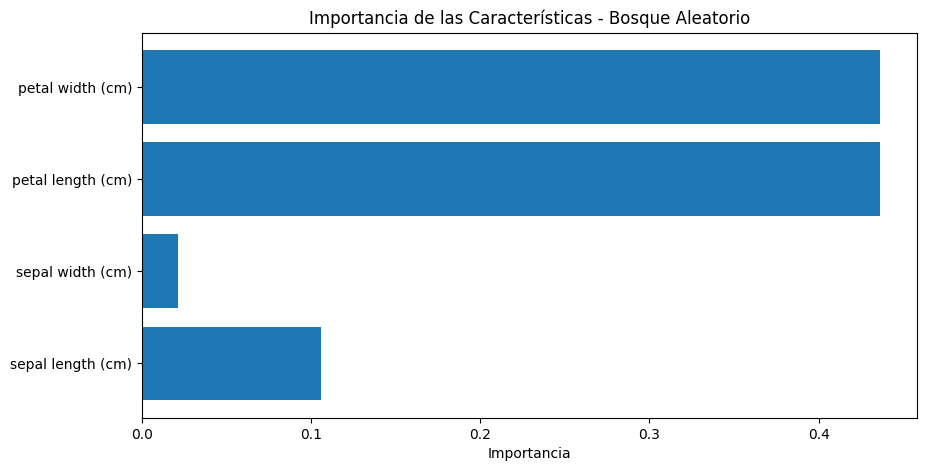

In [14]:
# Visualización de la importancia de las características para el bosque aleatorio
plt.figure(figsize=(10, 5))

plt.barh(range(len(importance_rf)), importance_rf, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Importancia')
plt.title('Importancia de las Características - Bosque Aleatorio')

plt.show()

En este ejemplo, se entrena un clasificador de árbol de decisión y un clasificador de bosque aleatorio en el conjunto de datos Iris, y se visualiza la importancia de las características para cada modelo. La altura de las barras en los gráficos indica la importancia relativa de cada característica.

Observa que la importancia de las características en el bosque aleatorio es más distribuida y tiende a ser más equitativa entre las características, lo que es característico de la capacidad del bosque aleatorio para manejar la correlación entre las características y proporcionar una visión más robusta de la importancia de cada una.

# **88. ¿Cómo funciona el clasificador Adaboost?, Intuición geométrica**

El clasificador AdaBoost, que significa "Adaptive Boosting" (Boosting Adaptativo), es un algoritmo de aprendizaje conjunto que combina varios clasificadores débiles para construir un clasificador fuerte. La intuición detrás de AdaBoost proviene de la idea de que al enfocarse en las instancias clasificadas incorrectamente por los clasificadores anteriores, se puede mejorar el rendimiento del modelo global.

**Funcionamiento de AdaBoost:**

1. **Peso Inicial:** Cada instancia en el conjunto de entrenamiento se asigna un peso inicial igual.

2. **Entrenamiento del Clasificador Débil:** Se entrena un clasificador débil (generalmente un árbol de decisión) en el conjunto de entrenamiento, y se evalúa su rendimiento.

3. **Peso de la Instancia:** Se calcula el error ponderado del clasificador débil, y las instancias mal clasificadas se les asigna un mayor peso para la siguiente iteración.

4. **Nuevo Clasificador Débil:** Se entrena otro clasificador débil, dando más importancia a las instancias mal clasificadas.

5. **Actualización de Peso:** Se actualizan los pesos de las instancias y se repiten los pasos 3-4 varias veces.

6. **Combinación de Clasificadores Débiles:** Los clasificadores débiles se combinan asignando un peso a cada uno de ellos, basado en su rendimiento.

7. **Predicción Final:** La predicción final se realiza tomando una votación ponderada de los clasificadores débiles.

**Intuición Geométrica:**

La intuición geométrica de AdaBoost se puede entender visualizando cómo cambian los pesos de las instancias en cada iteración. AdaBoost da más peso a las instancias mal clasificadas en cada iteración, lo que enfoca la atención del modelo en las regiones donde ha tenido dificultades.

**Ejemplo en Código y Visualización:**

Vamos a utilizar el conjunto de datos Iris y aplicar AdaBoost.

Precisión del modelo AdaBoost: 1.0


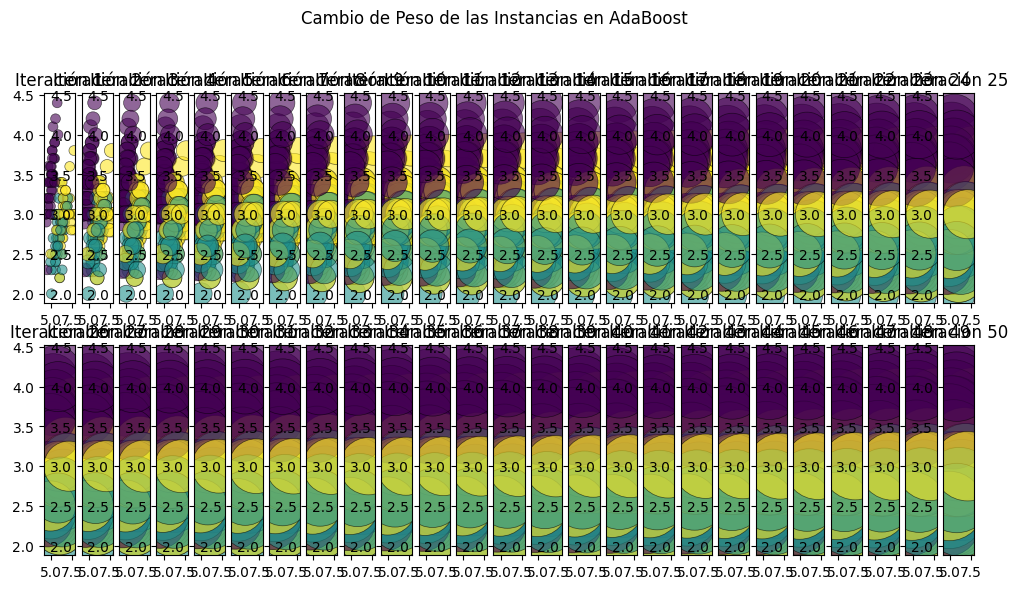

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador base (árbol de decisión)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Crear el clasificador AdaBoost
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Entrenar el modelo AdaBoost
adaboost_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = adaboost_classifier.predict(X_test)

# Calcular la precisión del modelo AdaBoost
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo AdaBoost: {accuracy}')

# Visualización del cambio de peso de las instancias
plt.figure(figsize=(12, 6))

# Número de iteraciones en AdaBoost
num_iterations = len(adaboost_classifier.estimators_)

for i in range(num_iterations):
    plt.subplot(2, num_iterations // 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50 * (i + 1),
                edgecolors='k', linewidth=0.5, alpha=0.6)
    plt.title(f'Iteración {i + 1}')

plt.suptitle('Cambio de Peso de las Instancias en AdaBoost', y=1.02)
plt.show()

En este ejemplo, entrenamos un clasificador AdaBoost en el conjunto de datos Iris y visualizamos cómo cambian los pesos de las instancias en cada iteración. Observarás que las instancias mal clasificadas obtienen un peso más alto en cada iteración, lo que refleja la adaptabilidad del algoritmo para centrarse en los errores y mejorar el rendimiento del modelo global.

# **89. AdaBoost Explicación paso a paso**

**AdaBoost: Adaptive Boosting**

AdaBoost es un algoritmo de aprendizaje conjunto que se centra en mejorar el rendimiento de los clasificadores débiles al asignarles pesos diferentes. El proceso se realiza en iteraciones, y se da más importancia a las instancias mal clasificadas en cada iteración. Aquí hay una descripción paso a paso:

**Paso 1: Peso Inicial**

Cada instancia en el conjunto de entrenamiento se asigna un peso inicial igual. Esto significa que cada instancia tiene la misma importancia al principio.

**Paso 2: Entrenamiento del Clasificador Débil**

Se entrena un clasificador débil (por lo general, un árbol de decisión) en el conjunto de entrenamiento. El clasificador débil es un modelo simple que tiene un rendimiento ligeramente mejor que el azar.

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador base (árbol de decisión)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Crear el clasificador AdaBoost
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Entrenar el modelo AdaBoost
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

**Paso 3: Peso de la Instancia**

Se calcula el error ponderado del clasificador débil, y las instancias mal clasificadas se les asigna un mayor peso para la siguiente iteración.

**Paso 4: Nuevo Clasificador Débil**

Se entrena otro clasificador débil, dando más importancia a las instancias mal clasificadas.

**Paso 5: Actualización de Peso**

Se actualizan los pesos de las instancias y se repiten los pasos 3-4 varias veces.

**Paso 6: Combinación de Clasificadores Débiles**

Los clasificadores débiles se combinan asignando un peso a cada uno de ellos, basado en su rendimiento.

**Paso 7: Predicción Final**

La predicción final se realiza tomando una votación ponderada de los clasificadores débiles.

In [21]:
# Realizar predicciones en el conjunto de prueba
y_pred = adaboost_classifier.predict(X_test)

**Paso 8: Evaluación del Modelo**

Finalmente, se evalúa el rendimiento del modelo AdaBoost.

In [22]:
from sklearn.metrics import accuracy_score

# Calcular la precisión del modelo AdaBoost
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo AdaBoost: {accuracy}')

Precisión del modelo AdaBoost: 1.0


**Visualización del Cambio de Peso de las Instancias**

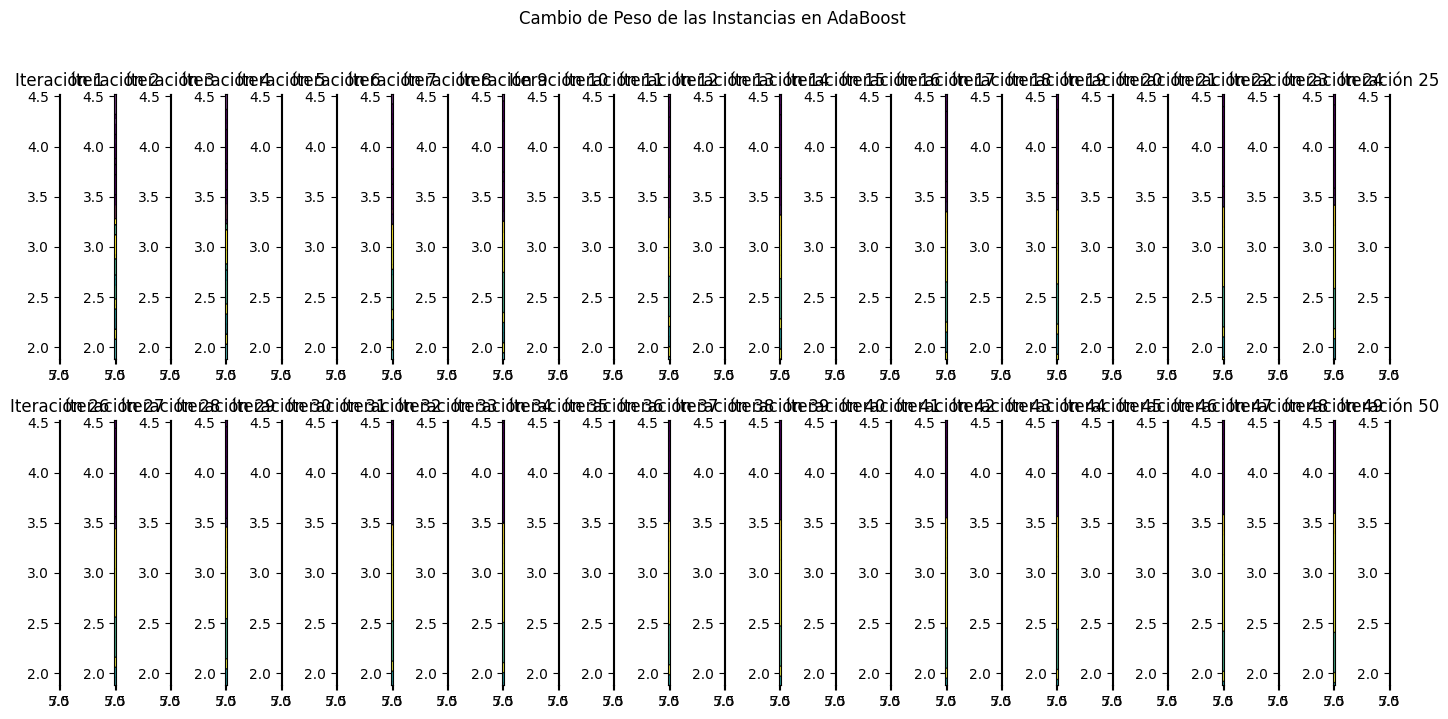

In [23]:
# Visualización del cambio de peso de las instancias
plt.figure(figsize=(14, 7))

# Número de iteraciones en AdaBoost
num_iterations = len(adaboost_classifier.estimators_)

for i in range(num_iterations):
    plt.subplot(2, num_iterations // 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=150 * (i + 1),
                edgecolors='k', linewidth=1, alpha=0.8)
    plt.title(f'Iteración {i + 1}')

plt.suptitle('Cambio de Peso de las Instancias en AdaBoost', y=1.02)
plt.tight_layout()
plt.show()

Esta visualización muestra cómo cambian los pesos de las instancias en cada iteración, enfocándose más en las instancias mal clasificadas. Puedes observar cómo el algoritmo adapta su enfoque para mejorar la clasificación de estas instancias a lo largo de las iteraciones.

# **90. Algoritmo AdaBoost, Código desde cero**

Voy a proporcionarte un código simple de AdaBoost desde cero utilizando Python y NumPy para un problema de clasificación binaria en un conjunto de datos bidimensional. A continuación, encontrarás una explicación detallada paso a paso junto con visualizaciones.

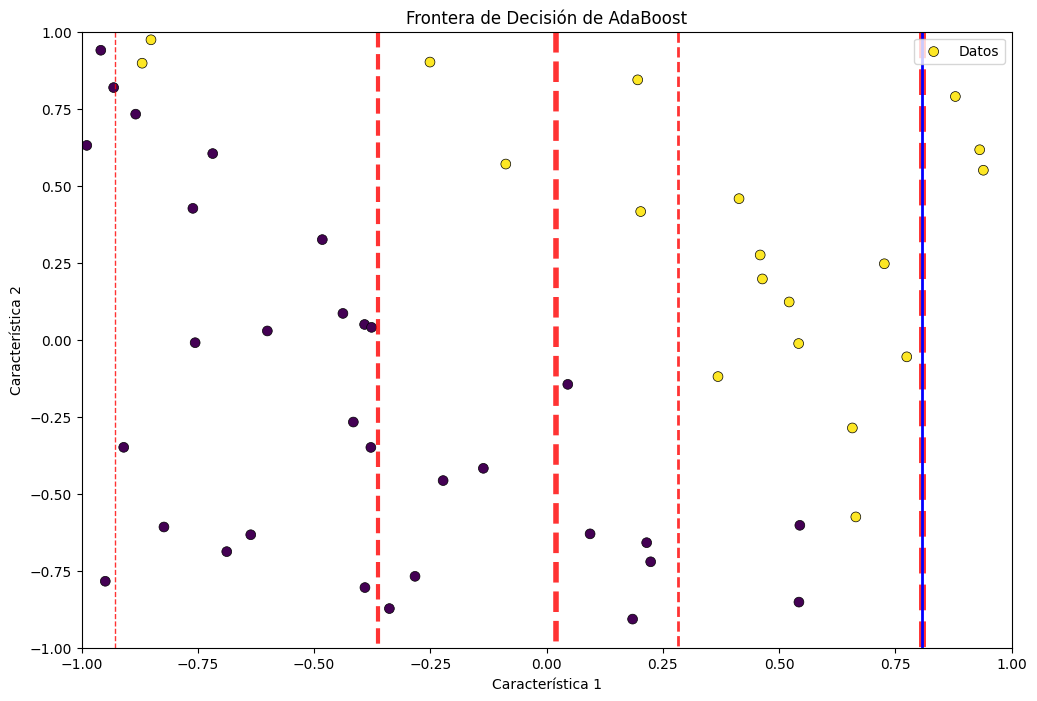

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Crear datos de ejemplo
np.random.seed(42)
X = np.random.rand(50, 2) * 2 - 1  # Datos en el rango [-1, 1]
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Clase positiva si la suma es positiva

# Inicializar pesos para las instancias
weights = np.ones(len(X)) / len(X)

# Número de iteraciones (clasificadores débiles)
num_iterations = 5

# Listas para almacenar clasificadores débiles y sus pesos
weak_classifiers = []
alphas = []

# Visualización de la frontera de decisión
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k', linewidth=0.5, label='Datos')

# Algoritmo AdaBoost
for i in range(num_iterations):
    # Crear un clasificador débil (hiperplano perpendicular a una de las características)
    threshold = np.random.uniform(-1, 1)
    weak_classifier = lambda x, y: 1 if x > threshold else -1

    # Calcular el error ponderado
    errors = (np.array([weak_classifier(x, y) for x, y in X]) != y).astype(int)
    weighted_error = np.sum(weights * errors)

    # Calcular el coeficiente alpha
    alpha = 0.5 * np.log((1 - weighted_error) / weighted_error)
    alphas.append(alpha)

    # Actualizar los pesos
    weights *= np.exp(-alpha * y * np.array([weak_classifier(x, y) for x, y in X]))
    weights /= np.sum(weights)

    # Almacenar el clasificador débil
    weak_classifiers.append(weak_classifier)

    # Visualización de la frontera de decisión
    xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    zz = np.array([weak_classifier(x, y) for x, y in zip(xx.ravel(), yy.ravel())])
    zz = zz.reshape(xx.shape)
    plt.contour(xx, yy, zz, colors='r', levels=[0], linestyles='dashed', linewidths=1 + i, alpha=0.8)

# Visualización de la frontera de decisión final
final_classifier = lambda x, y: np.sign(np.fromiter((alpha * weak_classifier(x, y) for weak_classifier, alpha in zip(weak_classifiers, alphas)), float).sum())
zz_final = np.array([final_classifier(x, y) for x, y in zip(xx.ravel(), yy.ravel())])
zz_final = zz_final.reshape(xx.shape)
plt.contour(xx, yy, zz_final, colors='b', levels=[0], linestyles='solid', linewidths=2, alpha=1.0)

# Configuración de la visualización
plt.title('Frontera de Decisión de AdaBoost')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

**Explicación Detallada:**

1. **Inicialización de Pesos:**
   - Se inicializan los pesos de las instancias por igual.

2. **Clasificador Débil:**
   - Se crea un clasificador débil en cada iteración. En este ejemplo, el clasificador débil es un hiperplano perpendicular a una de las características y su posición (umbral) se elige aleatoriamente.

3. **Error Ponderado y Coeficiente Alpha:**
   - Se calcula el error ponderado del clasificador débil y se utiliza para calcular el coeficiente alpha, que determina el peso del clasificador débil en la combinación final.

4. **Actualización de Pesos:**
   - Se actualizan los pesos de las instancias, dando más importancia a las instancias mal clasificadas.

5. **Visualización de la Frontera de Decisión:**
   - Se visualiza la frontera de decisión de cada clasificador débil y la frontera de decisión final que es una combinación ponderada de todos los clasificadores débiles.

Esta implementación proporciona una visualización de cómo AdaBoost mejora iterativamente la clasificación de los datos. Ten en cuenta que este ejemplo es simplificado y en la práctica se utilizan clasificadores más complejos.

| **Inicio** | **atrás 8** | **Siguiente 10** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./8_Machine_Learning.ipynb)| [⏩](./10_Machine_Learning.ipynb)|